### importing required files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
print (os.getcwd())

C:\Users\Dell


In [3]:
os.chdir ('C:\\Users\\Dell\\OneDrive\\Desktop\\CAR Price Prediction')

In [4]:
print (os.getcwd())

C:\Users\Dell\OneDrive\Desktop\CAR Price Prediction


## reading data

In [5]:
data=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\excel books\\audi.csv")
display(data)

,model,year,price,transmission,dist_travelled,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [6]:
import pandas_profiling as pp

In [7]:
display(pp.ProfileReport(data))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### manual data Exploration

In [8]:
print(len(data))

10668


In [9]:
print(data.shape)

(10668, 9)


In [10]:
display (data.dtypes )

model              object
year                int64
price               int64
transmission       object
dist_travelled      int64
fuelType           object
tax                 int64
mpg               float64
engineSize        float64
dtype: object

In [11]:
display (data.isna().sum() )

model             0
year              0
price             0
transmission      0
dist_travelled    0
fuelType          0
tax               0
mpg               0
engineSize        0
dtype: int64

In [12]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model           10668 non-null  object 
 1   year            10668 non-null  int64  
 2   price           10668 non-null  int64  
 3   transmission    10668 non-null  object 
 4   dist_travelled  10668 non-null  int64  
 5   fuelType        10668 non-null  object 
 6   tax             10668 non-null  int64  
 7   mpg             10668 non-null  float64
 8   engineSize      10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [13]:
display (data.describe ())

,year,price,dist_travelled,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [14]:
data

,model,year,price,transmission,dist_travelled,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [15]:
data.drop_duplicates(subset=['model','year','price','transmission','dist_travelled','fuelType','tax','mpg','engineSize'],inplace=True,keep='first')

In [16]:
data.shape

(10565, 9)

In [17]:
X = data.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)

(10565, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [18]:
data.head()

,model,year,price,transmission,dist_travelled,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [19]:
Y = data.iloc[:,[2]].values
display (Y.shape)
display (Y)

(10565, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [20]:
display(pd.DataFrame(X).head(5))

,0,1,2,3,4,5,6,7
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])
display (X)

array([[0, 2017, 'Manual', ..., 150, 55.4, 1.4],
       [5, 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [0, 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [2, 2020, 'Manual', ..., 150, 49.6, 1.0],
       [9, 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [9, 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

## one hot encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display (pd.DataFrame(X))


(10565, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10560,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10561,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10562,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10563,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


### Standardizing the data

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
display (pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9
0,-0.582997,1.203038,-0.714096,-1.119276,-0.039002,-0.393254,1.053589,0.357402,0.351966,-0.884062
1,1.715274,-0.831229,-0.714096,-0.158819,-0.500425,0.479662,-0.951665,-1.571222,1.030836,0.111173
2,-0.582997,1.203038,-0.714096,-1.119276,-0.500425,0.212815,1.053589,-1.422867,0.351966,-0.884062
3,1.715274,-0.831229,-0.714096,-0.543002,-0.039002,0.042479,-0.951665,0.283224,1.269983,0.111173
4,-0.582997,1.203038,-0.714096,-0.735093,0.883845,-0.979108,1.053589,0.283224,-0.095471,-1.547551
...,...,...,...,...,...,...,...,...,...,...
10560,-0.582997,1.203038,-0.714096,-0.735093,1.345269,-0.892959,1.053589,0.283224,-0.095471,-1.547551
10561,-0.582997,1.203038,-0.714096,-0.735093,1.345269,-0.979961,1.053589,0.357402,-0.095471,-1.547551
10562,-0.582997,1.203038,-0.714096,-0.735093,1.345269,-1.038346,1.053589,0.357402,-0.095471,-1.547551
10563,1.715274,-0.831229,-0.714096,0.609547,-0.039002,-0.695585,1.053589,0.357402,-0.226616,-0.884062


### spliting data to train and test the model 

In [56]:
from sklearn.model_selection import train_test_split

(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)


print (X_train.shape, Y_train.shape)
print(Y_test.shape)

(8452, 10) (8452, 1)
(2113, 1)


## using  regression

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)


LinearRegression()

In [29]:
y_pred = reg.predict(X_test)
display (y_pred.shape)

(2113, 1)

In [30]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[31863.18288911 34991.        ]
 [19374.13511826 17299.        ]
 [13295.65796165 11444.        ]
 ...
 [18373.48622929 17670.        ]
 [20230.20801119 14290.        ]
 [17652.48622929 18990.        ]]


### checking for accuracy 

In [32]:

from sklearn.metrics import r2_score,mean_absolute_error
print('R2 Score ', r2_score(Y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.7941818440937328
Mean Absolute Error 3244.810815892843


In [33]:
y_pred = reg.predict(X)
display (y_pred)
y_pred.shape


array([[14861.39031251],
       [20407.69760853],
       [13617.39031251],
       ...,
       [19728.17779394],
       [21238.75145114],
       [16811.25145114]])

(10565, 1)

In [61]:
result = pd.concat([data,pd.DataFrame(y_pred)],axis=1)
display( result.head())
result.rename(columns={0: 'pred_price'}, inplace=True)
display( result)

,model,year,price,transmission,dist_travelled,fuelType,tax,mpg,engineSize,0
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,34565.810000
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,16820.730000
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,11530.840000
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,24245.476667
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,15256.480000


,model,year,price,transmission,dist_travelled,fuelType,tax,mpg,engineSize,pred_price
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,34565.810000
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,16820.730000
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,11530.840000
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,24245.476667
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,15256.480000
...,...,...,...,...,...,...,...,...,...,...
1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44255.550000
1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32483.820000
1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33188.750000
1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12127.800000


In [64]:
actual=data.iloc[:2113,2]
actual
distance=data.iloc[:2113,4]
print(distance)

0       15735
1       36203
2       29946
3       25952
4        1998
        ...  
2121    52595
2122    25000
2123    31292
2124    49652
2125    15016
Name: dist_travelled, Length: 2113, dtype: int64


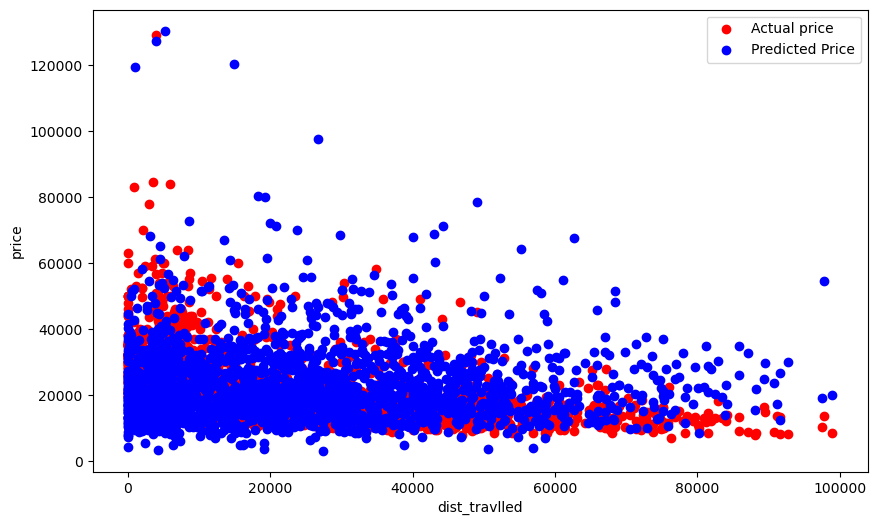

In [67]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.xlabel('dist_travlled')
plt.ylabel('price')
plt.scatter(distance,actual,color='red')
plt.scatter(distance,y_pred,color='blue')

plt.legend(['Actual price ','Predicted Price'])
plt.show()

### using random forest regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
display (regression)


RandomForestRegressor(random_state=0)

In [69]:
from sklearn.model_selection import train_test_split

(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)


print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(8452, 10) (8452, 1)
(2113, 10) (2113, 1)


In [70]:
y_pred = regression.predict(X_test)
display (y_pred)

array([34565.81, 16820.73, 11530.84, ..., 18497.45, 17153.97, 18620.66])

In [71]:
result = pd.concat([data,pd.DataFrame(y_pred)],axis=1)
display( result.tail(50))
result.rename(columns={0: 'pred_price'}, inplace=True)
display( result)

,model,year,price,transmission,dist_travelled,fuelType,tax,mpg,engineSize,0
10631,TT,2012.0,10490.0,Manual,24693.0,Diesel,165.0,51.4,2.0,NaN
10632,A1,2010.0,9990.0,Automatic,38000.0,Petrol,125.0,53.3,1.4,NaN
10633,A4,2018.0,26891.0,Automatic,22414.0,Petrol,145.0,36.7,3.0,NaN
10634,Q7,2017.0,45595.0,Automatic,28949.0,Diesel,145.0,39.2,4.0,NaN
10635,A3,2016.0,18000.0,Automatic,29494.0,Petrol,125.0,49.6,2.0,NaN
10636,A1,2013.0,9291.0,Manual,29382.0,Petrol,125.0,53.3,1.4,NaN
10637,A5,2017.0,21291.0,Automatic,29666.0,Diesel,30.0,65.7,2.0,NaN
10638,A4,2017.0,18491.0,Automatic,17900.0,Petrol,145.0,50.4,1.4,NaN
10639,A6,2020.0,28000.0,Automatic,2511.0,Diesel,145.0,47.9,2.0,NaN
10640,Q5,2020.0,37000.0,Automatic,1436.0,Petrol,145.0,32.1,2.0,NaN


,model,year,price,transmission,dist_travelled,fuelType,tax,mpg,engineSize,pred_price
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,34565.810000
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,16820.730000
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,11530.840000
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,24245.476667
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,15256.480000
...,...,...,...,...,...,...,...,...,...,...
1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44255.550000
1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32483.820000
1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33188.750000
1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12127.800000


## checking for accuracy 

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.9587306545197221
Mean Absolute Error 1517.4627789258122


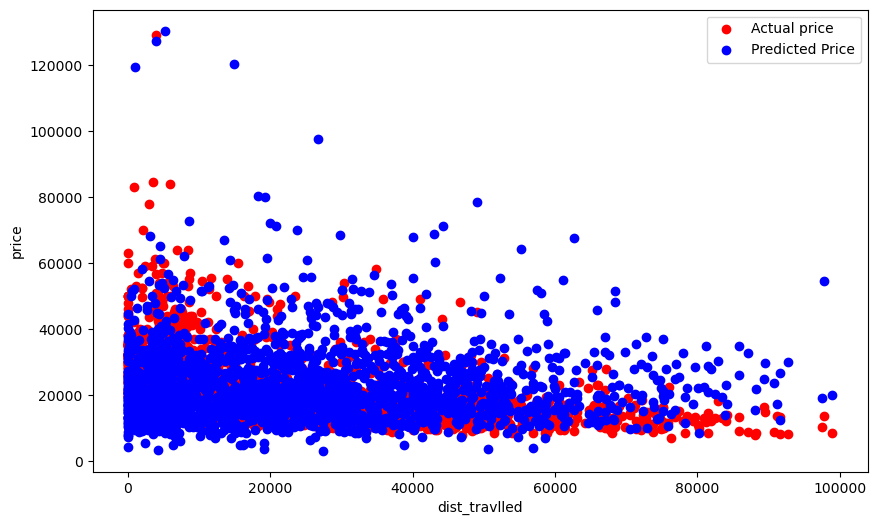

In [73]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.xlabel('dist_travlled')
plt.ylabel('price')
plt.scatter(distance,actual,color='red')
plt.scatter(distance,y_pred,color='blue')

plt.legend(['Actual price ','Predicted Price'])
plt.show()

### using extra tree classifier 

In [74]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators=120)
ET_Model.fit(X_train,Y_train)
y_predict=ET_Model.predict(X_test)
import numpy as np

### checking for Accuracy 

In [75]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 Score :', r2_score(Y_test, y_predict))
print ('Mean Absolute Error:', mean_absolute_error(Y_test,y_predict))

R2 Score : 0.9616908529552858
Mean Absolute Error: 1528.0720414629016


In [76]:
y_pred = reg.predict(X)
display (y_pred)
result = pd.concat([data,pd.DataFrame(y_pred)],axis=1).head()
display( result)

array([[14861.39031251],
       [20407.69760853],
       [13617.39031251],
       ...,
       [19728.17779394],
       [21238.75145114],
       [16811.25145114]])

,model,year,price,transmission,dist_travelled,fuelType,tax,mpg,engineSize,0
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,14861.390313
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,20407.697609
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,13617.390313
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,20163.341671
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,17648.177794


In [77]:
np.linspace(start = 80, stop = 1500, num = 10)

array([  80.        ,  237.77777778,  395.55555556,  553.33333333,
        711.11111111,  868.88888889, 1026.66666667, 1184.44444444,
       1342.22222222, 1500.        ])

### using randomized search cv on Random forest regressor

In [78]:
### Randomized search CV

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]

In [81]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [82]:
rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [83]:
rf=RandomForestRegressor()

In [87]:
rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=3,cv=3,random_state=42, n_jobs = 1)

In [89]:
display (rCV.fit(X_train,Y_train))

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [90]:
rf_pred=rCV.predict(X_test)
display (rf_pred)


array([34557.65053662, 16826.39957532, 11468.42119544, ...,
       18841.59609037, 16981.07952381, 18616.09744453])

In [91]:
rf_pred=rCV.predict(X_test)
display (rf_pred)


array([34557.65053662, 16826.39957532, 11468.42119544, ...,
       18841.59609037, 16981.07952381, 18616.09744453])

In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y_test,rf_pred))
print('MSE',mean_squared_error(Y_test,rf_pred))


MAE 1503.2318699395405
MSE 6101282.963823229


### checking for accuracy

In [93]:
display (r2_score(Y_test,rf_pred))

0.9580782791253994

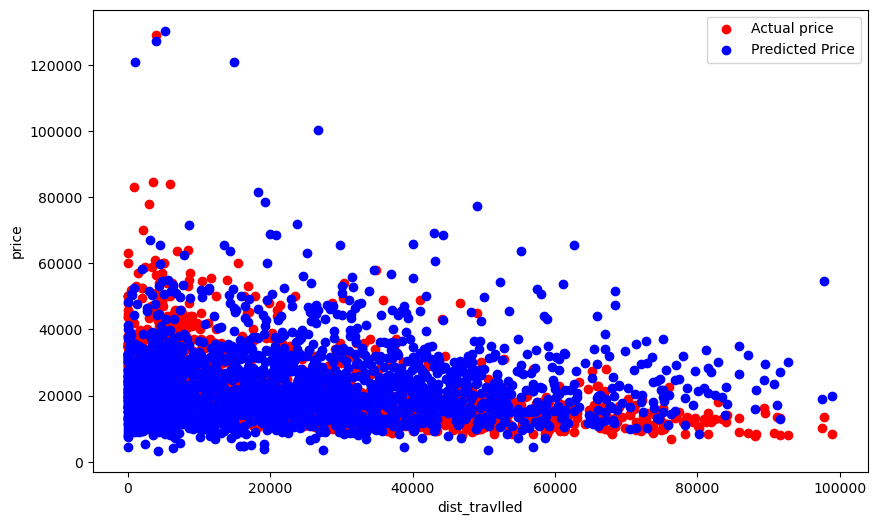

In [95]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.xlabel('dist_travlled')
plt.ylabel('price')
plt.scatter(distance,actual,color='red')
plt.scatter(distance,rf_pred,color='blue')

plt.legend(['Actual price ','Predicted Price'])
plt.show()

## using  Cat boost 

In [96]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
print (cat.fit(X_train,Y_train))

Learning rate set to 0.057364
0:	learn: 11114.3972284	total: 145ms	remaining: 2m 24s
1:	learn: 10673.2274762	total: 150ms	remaining: 1m 14s
2:	learn: 10206.4353989	total: 155ms	remaining: 51.6s
3:	learn: 9768.7344047	total: 160ms	remaining: 39.9s
4:	learn: 9368.4368856	total: 165ms	remaining: 32.8s
5:	learn: 8968.6665759	total: 170ms	remaining: 28.1s
6:	learn: 8612.6905308	total: 174ms	remaining: 24.7s
7:	learn: 8267.8198589	total: 178ms	remaining: 22.1s
8:	learn: 7937.1451542	total: 183ms	remaining: 20.1s
9:	learn: 7640.8621827	total: 186ms	remaining: 18.5s
10:	learn: 7352.8621338	total: 189ms	remaining: 17s
11:	learn: 7082.4483780	total: 191ms	remaining: 15.7s
12:	learn: 6845.5330930	total: 193ms	remaining: 14.7s
13:	learn: 6601.8601574	total: 195ms	remaining: 13.8s
14:	learn: 6377.0053186	total: 198ms	remaining: 13s
15:	learn: 6175.5728347	total: 201ms	remaining: 12.3s
16:	learn: 5974.3551277	total: 204ms	remaining: 11.8s
17:	learn: 5783.4229530	total: 206ms	remaining: 11.2s
18:	lea

In [97]:
cat_pred=cat.predict(X_test)
display (cat_pred)

array([34403.2885362 , 18068.56325027, 11918.19730173, ...,
       18621.48599089, 16917.10863635, 18220.58207119])

In [98]:
display (r2_score(Y_test,cat_pred))

0.9621533622246573

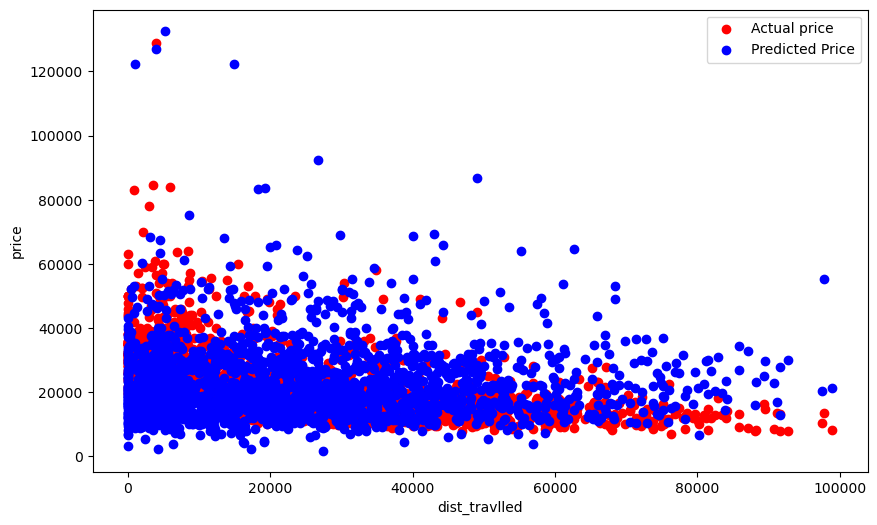

In [99]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.xlabel('dist_travlled')
plt.ylabel('price')
plt.scatter(distance,actual,color='red')
plt.scatter(distance,cat_pred,color='blue')

plt.legend(['Actual price ','Predicted Price'])
plt.show()

### using knn regressor

In [100]:
'''from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error'''

In [101]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [102]:
#knn_regressor = KNeighborsRegressor(n_neighbors=4)

In [103]:
#knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [104]:
#y_pred = knn_regressor.predict(X_test)
#print(y_pred)

[[12012.25]
 [51022.75]
 [21836.5 ]
 ...
 [33570.25]
 [34067.5 ]
 [23068.5 ]]


In [105]:
#mse = mean_squared_error(y_test, y_pred)
#print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10637199.819953857


In [106]:
#from sklearn.metrics import r2_score,mean_absolute_error
#print  ('R2 Score ', r2_score(Y_test, y_pred))
#print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  -0.8399832996535019
Mean Absolute Error 11510.805608140085


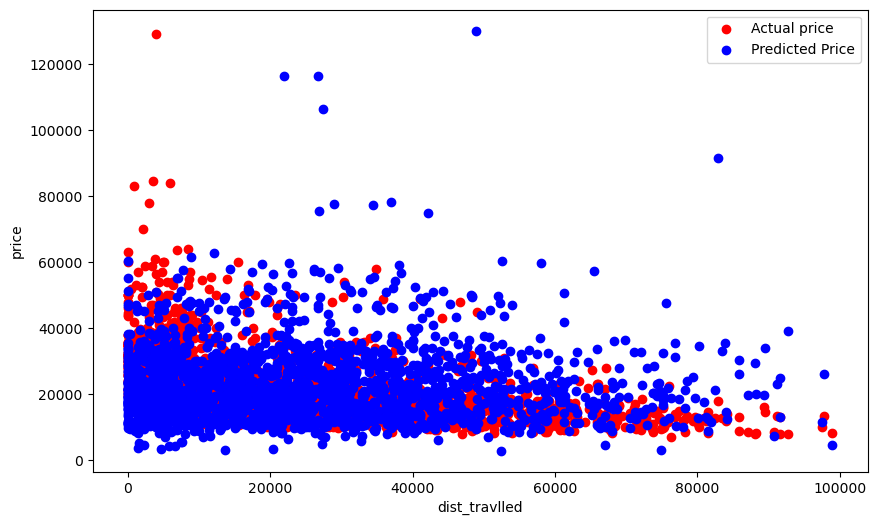

In [107]:
'''%matplotlib inline
plt.figure(figsize=(10, 6))
plt.xlabel('dist_travlled')
plt.ylabel('price')
plt.scatter(distance,actual,color='red')
plt.scatter(distance,y_pred,color='blue')

plt.legend(['Actual price ','Predicted Price'])
plt.show()'''

## knn regressor is not good

## decision tree regressor

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [109]:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

In [110]:
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [111]:
y_pred = decision_tree_regressor.predict(X_test)

In [112]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


### finding accuracy 

In [113]:
print(r2)

0.9157158347563045


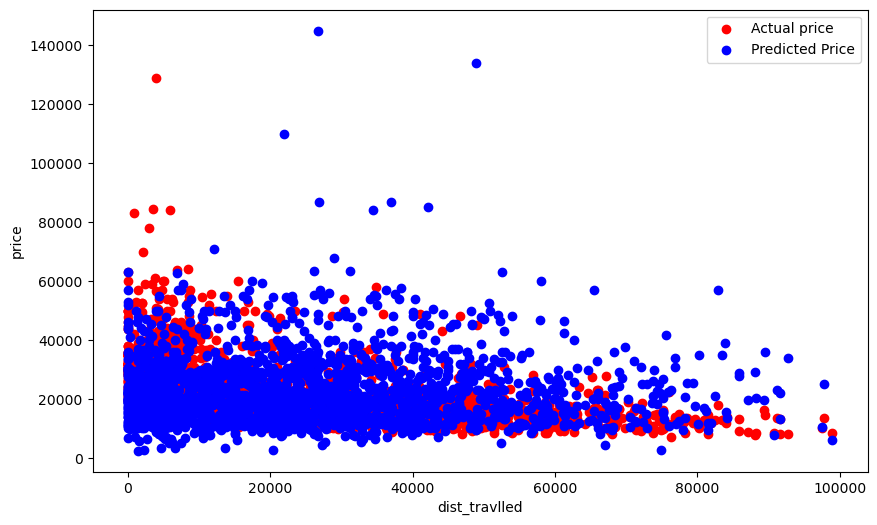

In [114]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.xlabel('dist_travlled')
plt.ylabel('price')
plt.scatter(distance,actual,color='red')
plt.scatter(distance,y_pred,color='blue')

plt.legend(['Actual price ','Predicted Price'])
plt.show()

### Conclusion 

##### Random forest  and decision tree are giving high accuracy  than linear and knn regressor  and desicion tree regressor is also showing better result, and also done randomized search CV for randomforest  model by taking parameters randomly also gave good results